In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.ticker import ScalarFormatter

In [2]:
# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

In [3]:
data = pd.read_csv('data/스테이션/스테이션 월계점 판매 데이터 (24.01~04)/이마트 월계점 판매 데이터.csv')

In [4]:
data.dtypes

매장              object
매장명             object
판매일자            object
전표번호             int64
브랜드명            object
카테고리            object
판매상품            object
결제수단            object
판매금액           float64
환불금액           float64
판매수량           float64
환불수량           float64
본사바코드           object
비고              object
Unnamed: 14     object
dtype: object

In [5]:
data_info = data.info()
data_head = data.head()

data_info, data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5163 entries, 0 to 5162
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   매장           5163 non-null   object 
 1   매장명          5163 non-null   object 
 2   판매일자         5163 non-null   object 
 3   전표번호         5163 non-null   int64  
 4   브랜드명         5163 non-null   object 
 5   카테고리         5163 non-null   object 
 6   판매상품         5124 non-null   object 
 7   결제수단         4903 non-null   object 
 8   판매금액         4929 non-null   float64
 9   환불금액         234 non-null    float64
 10  판매수량         4929 non-null   float64
 11  환불수량         234 non-null    float64
 12  본사바코드        5163 non-null   object 
 13  비고           802 non-null    object 
 14  Unnamed: 14  6 non-null      object 
dtypes: float64(4), int64(1), object(10)
memory usage: 605.2+ KB


(None,
      매장      매장명        판매일자   전표번호 브랜드명  카테고리  판매상품 결제수단     판매금액     환불금액  \
 0  M012  이마트_월계점  2024-01-01  11078   마니  여성의류  누빔바지   카드  69000.0      NaN   
 1  M012  이마트_월계점  2024-01-01  11020   마니  여성의류   티셔츠   카드      NaN  19900.0   
 2  M012  이마트_월계점  2024-01-01  11033   마니  여성의류  골덴바지   카드  27000.0      NaN   
 3  M012  이마트_월계점  2024-01-01  11058   마니  여성의류     -  NaN      NaN  19900.0   
 4  M012  이마트_월계점  2024-01-01  11034   마니  여성의류  골덴바지   카드  27000.0      NaN   
 
    판매수량  환불수량            본사바코드         비고 Unnamed: 14  
 0   1.0   NaN  B235KA99400000F        NaN         NaN  
 1   NaN   1.0  B235KA99400000F  12/31 판매분         NaN  
 2   1.0   NaN  B235KA99400000F        NaN         NaN  
 3   NaN   1.0  B235KA99400000F   당일취소건 추정         NaN  
 4   1.0   NaN  B235KA99400000F        NaN         NaN  )

In [6]:
# 결측값 분석
missing_values = data.isnull().sum()

# 기본 통계치 확인
basic_stats = data.describe()

missing_values, basic_stats

(매장                0
 매장명               0
 판매일자              0
 전표번호              0
 브랜드명              0
 카테고리              0
 판매상품             39
 결제수단            260
 판매금액            234
 환불금액           4929
 판매수량            234
 환불수량           4929
 본사바코드             0
 비고             4361
 Unnamed: 14    5157
 dtype: int64,
                전표번호           판매금액           환불금액         판매수량        환불수량
 count   5163.000000    4929.000000     234.000000  4929.000000  234.000000
 mean   11031.914003   20060.661595   25947.525641     1.323189    1.277778
 std       27.040515   16232.101894   22245.299939     0.732501    0.708454
 min    11001.000000     100.000000     100.000000     1.000000    1.000000
 25%    11012.000000   10000.000000   10000.000000     1.000000    1.000000
 50%    11024.000000   15000.000000   19900.000000     1.000000    1.000000
 75%    11045.000000   25000.000000   30000.000000     1.000000    1.000000
 max    11152.000000  209500.000000  197000.000000    14.00000

In [7]:
# '판매일자' 컬럼을 datetime 타입으로 변환
data['판매일자'] = pd.to_datetime(data['판매일자'])

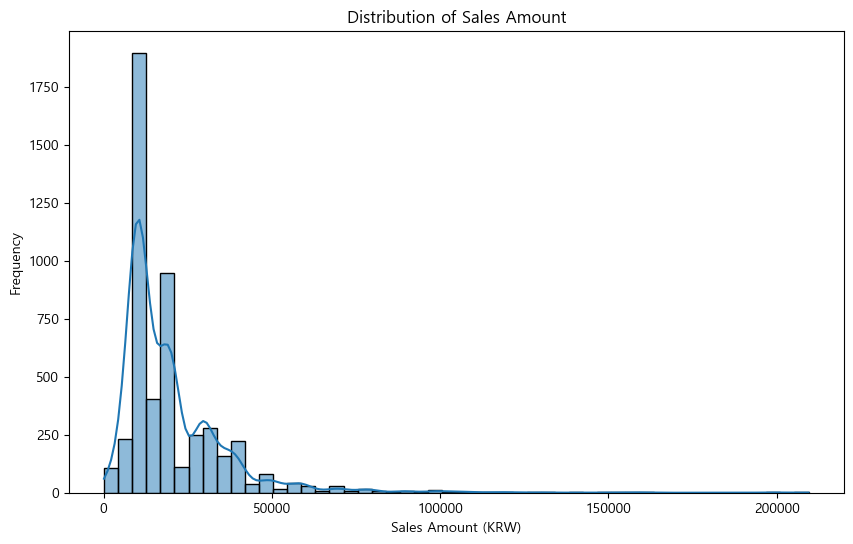

In [8]:
# 판매금액 분포 시각화
plt.figure(figsize=(10, 6))
sns.histplot(data['판매금액'], bins=50, kde=True)
plt.title('Distribution of Sales Amount')
plt.xlabel('Sales Amount (KRW)')
plt.ylabel('Frequency')
plt.show()

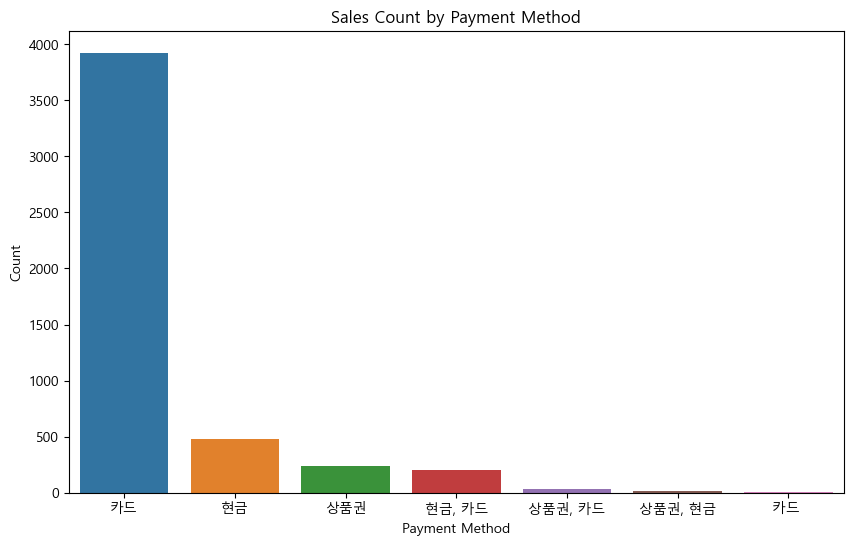

In [9]:
# 결제수단별 판매 비율 시각화
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='결제수단', order=data['결제수단'].value_counts().index)
plt.title('Sales Count by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()

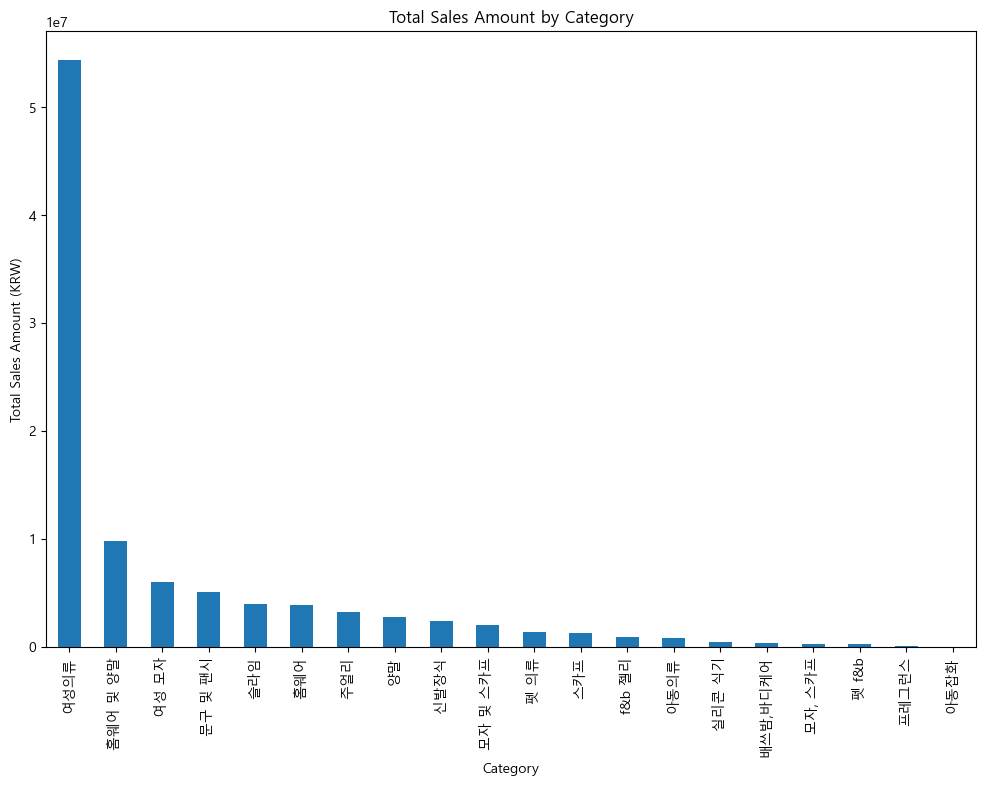

In [10]:
# 카테고리별 판매금액 합계 시각화
category_sales = data.groupby('카테고리')['판매금액'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
category_sales.plot(kind='bar')
plt.title('Total Sales Amount by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales Amount (KRW)')
plt.show()

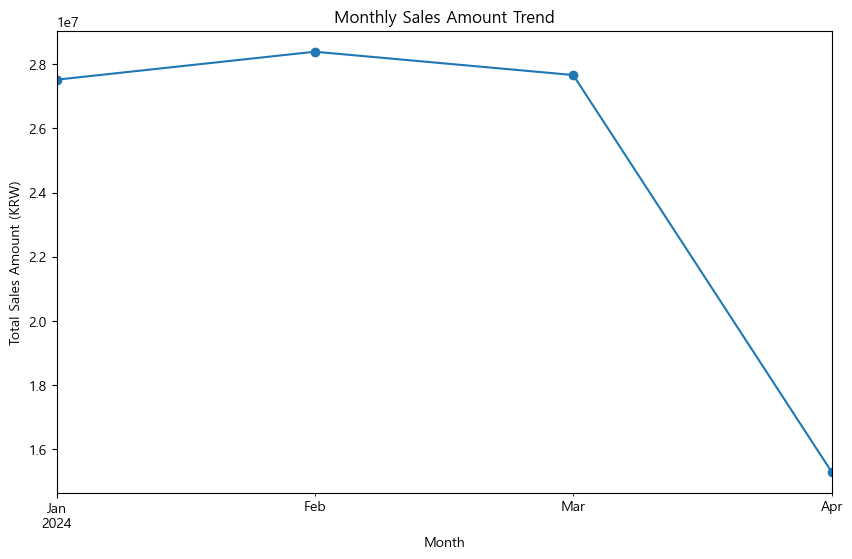

In [11]:
# 월별 판매금액 추이 시각화
data['월'] = data['판매일자'].dt.to_period('M')
monthly_sales = data.groupby('월')['판매금액'].sum()

plt.figure(figsize=(10, 6))
monthly_sales.plot(marker='o')
plt.title('Monthly Sales Amount Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount (KRW)')
plt.show()

In [4]:
# Drop rows with NaN in '브랜드명' or '판매상품' columns
data = data.dropna(subset=['브랜드명', '판매상품'])

# Split the '판매상품' column by ',' and explode the list to separate rows
data['판매상품'] = data['판매상품'].str.split(',')
exploded_data = data.explode('판매상품')

# Count each '판매상품' per '브랜드명'
product_counts = exploded_data.groupby(['브랜드명', '판매상품']).size().reset_index(name='count')

# Calculate the total count per '브랜드명'
brand_total_counts = product_counts.groupby('브랜드명')['count'].sum().reset_index(name='total_count')

# Merge the total count with product counts to calculate the ratio
product_counts = pd.merge(product_counts, brand_total_counts, on='브랜드명')

# Calculate the ratio of each product per brand
product_counts['ratio'] = product_counts['count'] / product_counts['total_count']

In [5]:
product_counts

,브랜드명,판매상품,count,total_count,ratio
0,개달당,꽃나염원피스핑크(M),1,73,0.013699
1,개달당,꽃와플티그린(2XL),1,73,0.013699
2,개달당,모자,2,73,0.027397
3,개달당,모자,1,73,0.013699
4,개달당,모자(L),1,73,0.013699
...,...,...,...,...,...
994,플렉스앤락,수저set5종,1,26,0.038462
995,플렉스앤락,스푼포크set,2,26,0.076923
996,플렉스앤락,스푼포크set(파랑,1,26,0.038462
997,플렉스앤락,찬통(레드),1,26,0.038462


In [8]:
# '브랜드명' 또는 '판매상품' 열에 NaN이 있는 행 삭제
data = data.dropna(subset=['브랜드명', '판매상품'])

# '판매상품' 열을 문자열로 처리
data['판매상품'] = data['판매상품'].astype(str)

# 공백 및 괄호와 괄호 안의 내용 제거
data['판매상품'] = data['판매상품'].str.replace(r'\s*\(.*?\)\s*', '', regex=True)
data['판매상품'] = data['판매상품'].str.replace(r'\s+', '', regex=True)
data['판매상품'] = data['판매상품'].str.replace(r'[\[\]]', '', regex=True)  # 대괄호 제거

# '판매상품'이 '-'인 행 제거
data = data[~data['판매상품'].str.contains('-')]

# '판매상품' 문자열 앞뒤에 붙어있는 따옴표(') 제거
data['판매상품'] = data['판매상품'].str.strip("'")

# '비고' 열을 파싱하여 제품 수량을 계산하는 헬퍼 함수
def get_product_count(product, remark, default_count):
    if pd.isna(remark):
        return default_count
    product_escaped = re.escape(product)
    match = re.search(fr'{product_escaped}\s*(\d+)', remark)
    if match:
        return int(match.group(1))
    return default_count

# 데이터 처리
rows = []
for _, row in data.iterrows():
    products = row['판매상품'].split(',')
    total_qty = int(row['판매수량']) if not pd.isna(row['판매수량']) else 1

    if len(products) == 1:
        # '판매상품'에 ','이 없는 경우
        rows.append([row['브랜드명'], row['카테고리'], products[0].strip(), total_qty])
    else:
        # '판매상품'에 ','이 있는 경우
        if len(products) <= total_qty:
            # 각 판매상품의 판매수량을 모두 1로 집계
            for product in products:
                rows.append([row['브랜드명'], row['카테고리'], product.strip(), 1])
        else:
            # '비고'를 참고하여 판매수량 집계
            remaining_qty = total_qty
            for product in products:
                count = get_product_count(product.strip(), row['비고'], 1)
                rows.append([row['브랜드명'], row['카테고리'], product.strip(), count])
                remaining_qty -= count

            # '비고'에 포함되지 않은 나머지 판매상품의 판매수량은 1로 집계
            for product in products:
                if get_product_count(product.strip(), row['비고'], 0) == 0:
                    rows.append([row['브랜드명'], row['카테고리'], product.strip(), 1])
                    remaining_qty -= 1

            # remaining_qty가 0보다 크면 나머지 수량을 분배
            if remaining_qty > 0:
                for product in products:
                    rows.append([row['브랜드명'], row['카테고리'], product.strip(), remaining_qty])
                    break

# 처리된 행들로부터 새로운 데이터프레임 생성
processed_data = pd.DataFrame(rows, columns=['브랜드명', '카테고리', '판매상품', '판매수량'])

# '브랜드명', '카테고리', '판매상품'별로 판매수량 합계 계산
grouped_data = processed_data.groupby(['브랜드명', '카테고리', '판매상품'])['판매수량'].sum().reset_index()

# CSV 파일로 저장
output_path = 'processed_sales_data_2.csv'
grouped_data.to_csv(output_path, index=False, encoding='cp949')

output_path

'processed_sales_data_2.csv'

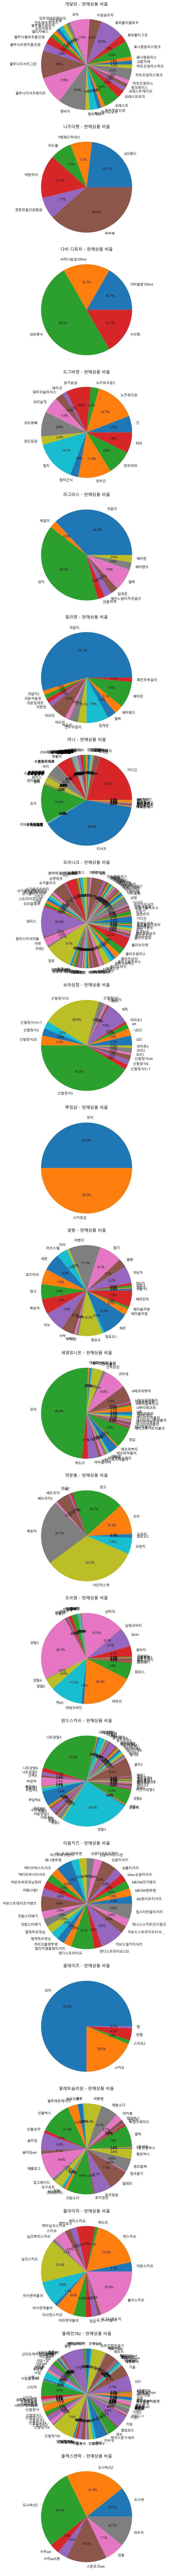

In [23]:
# '브랜드명' 또는 '판매상품' 열에 NaN이 있는 행 삭제
data = data.dropna(subset=['브랜드명', '판매상품'])

# '판매상품' 열을 문자열로 처리
data['판매상품'] = data['판매상품'].astype(str)

# 공백 및 괄호와 괄호 안의 내용 제거
data['판매상품'] = data['판매상품'].str.replace(r'\s*\(.*?\)\s*', '', regex=True)
data['판매상품'] = data['판매상품'].str.replace(r'\s+', '', regex=True)
data['판매상품'] = data['판매상품'].str.replace(r'[\[\]]', '', regex=True)  # 대괄호 제거

# '판매상품'에 '-'를 포함하지 않는 행만 필터링
data = data[~data['판매상품'].str.contains('-')]

# '비고' 열을 파싱하여 제품 수량을 계산하는 헬퍼 함수
def get_product_count(product, remark, default_count):
    if pd.isna(remark):
        return default_count
    product_escaped = re.escape(product)  # 특수 문자가 포함된 제품명을 정규 표현식에서 안전하게 처리
    match = re.search(fr'{product_escaped}\s*(\d+)', remark)
    if match:
        return int(match.group(1))
    return default_count

# 데이터 처리
rows = []
for _, row in data.iterrows():
    products = row['판매상품'].split(',')
    total_qty = row['판매수량'] if not pd.isna(row['판매수량']) else 1
    qty_per_product = total_qty / len(products) if pd.isna(row['비고']) else 1
    
    for product in products:
        count = get_product_count(product.strip(), row['비고'], qty_per_product)
        rows.append([row['브랜드명'], product.strip(), count])

# 처리된 행들로부터 새로운 데이터프레임 생성
processed_data = pd.DataFrame(rows, columns=['브랜드명', '판매상품', '판매수량'])

# '브랜드명'과 '판매상품'별로 판매수량 합계 계산
grouped_data = processed_data.groupby(['브랜드명', '판매상품'])['판매수량'].sum().reset_index()

# '브랜드명'별 총 판매수량 계산
total_sales_per_brand = grouped_data.groupby('브랜드명')['판매수량'].sum().reset_index(name='total_count')

# 비율 계산을 위해 병합
grouped_data = pd.merge(grouped_data, total_sales_per_brand, on='브랜드명')
grouped_data['ratio'] = grouped_data['판매수량'] / grouped_data['total_count']

# 데이터 시각화
brands = grouped_data['브랜드명'].unique()

fig, axes = plt.subplots(len(brands), 1, figsize=(10, len(brands) * 5))

for i, brand in enumerate(brands):
    brand_data = grouped_data[grouped_data['브랜드명'] == brand]
    labels = [label if len(label) <= 10 else label[:10] + '...' for label in brand_data['판매상품']]
    axes[i].pie(brand_data['ratio'], labels=labels, autopct='%1.1f%%', textprops={'fontsize': 10})
    axes[i].set_title(f'{brand} - 판매상품 비율', fontsize=12)

plt.tight_layout()
plt.show()

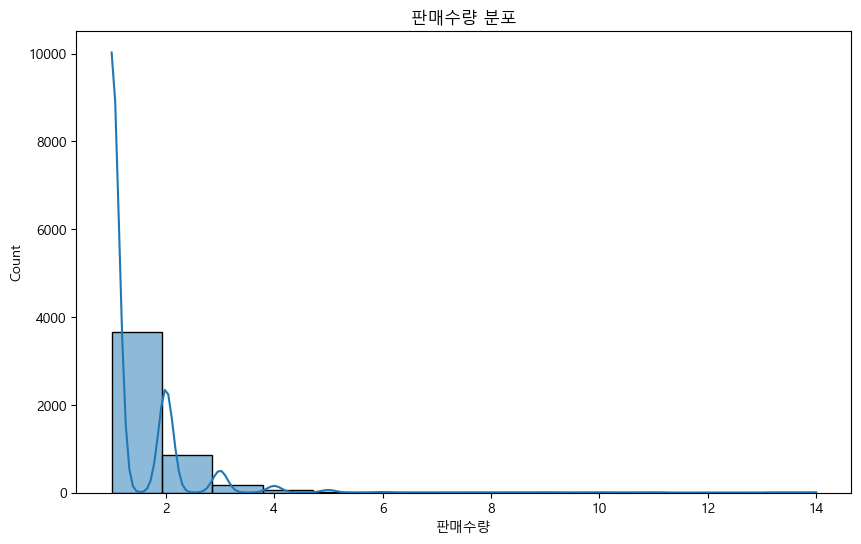

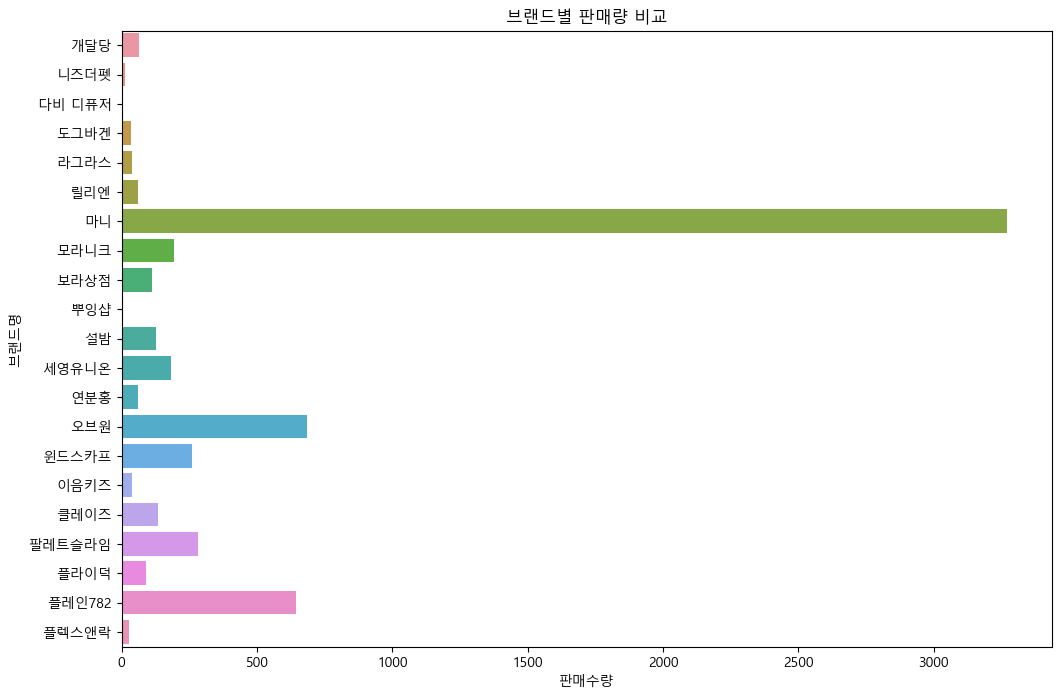

C:\Users\Puser\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


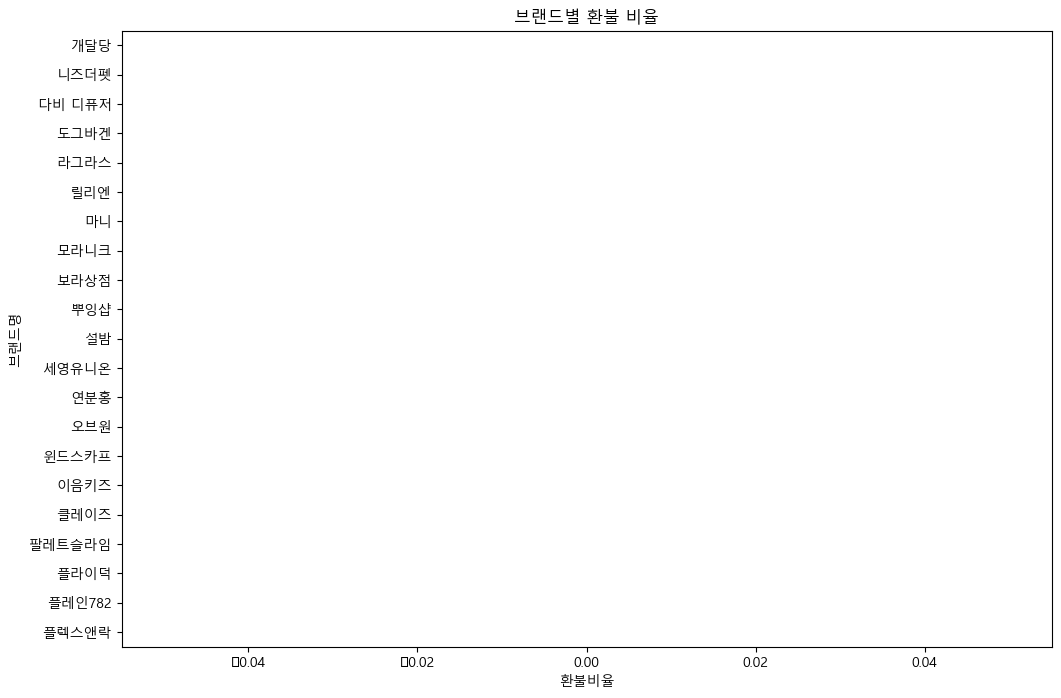

In [24]:
# 판매수량 분포 시각화
plt.figure(figsize=(10, 6))
sns.histplot(data['판매수량'], kde=True)
plt.title('판매수량 분포')
plt.show()

# 브랜드별 판매량 비교
brand_sales = data.groupby('브랜드명')['판매수량'].sum().reset_index()
plt.figure(figsize=(12, 8))
sns.barplot(x='판매수량', y='브랜드명', data=brand_sales)
plt.title('브랜드별 판매량 비교')
plt.show()

# 환불 비율 계산 및 시각화
data['환불비율'] = data['환불수량'] / (data['판매수량'] + data['환불수량'])
brand_refund_rate = data.groupby('브랜드명')['환불비율'].mean().reset_index()
plt.figure(figsize=(12, 8))
sns.barplot(x='환불비율', y='브랜드명', data=brand_refund_rate)
plt.title('브랜드별 환불 비율')
plt.show()